# Task 0

In [1]:
import json
import os

import matplotlib.pyplot as plt
from pathlib import Path

sim_dir = Path("../../../../../results/simulation")
hw_dir = Path("../../../../../results/hardware")

In [2]:
def load_runs(directory, label_prefix):
    runs = []
    for file in sorted(directory.glob("*.json")):
        with open(file) as f:
            data = json.load(f)["raw_ir_data"]
        runs.append((label_prefix + " " + file.stem, data))
    return runs

sim_runs = load_runs(sim_dir, "Sim")
hw_runs = load_runs(hw_dir, "HW")

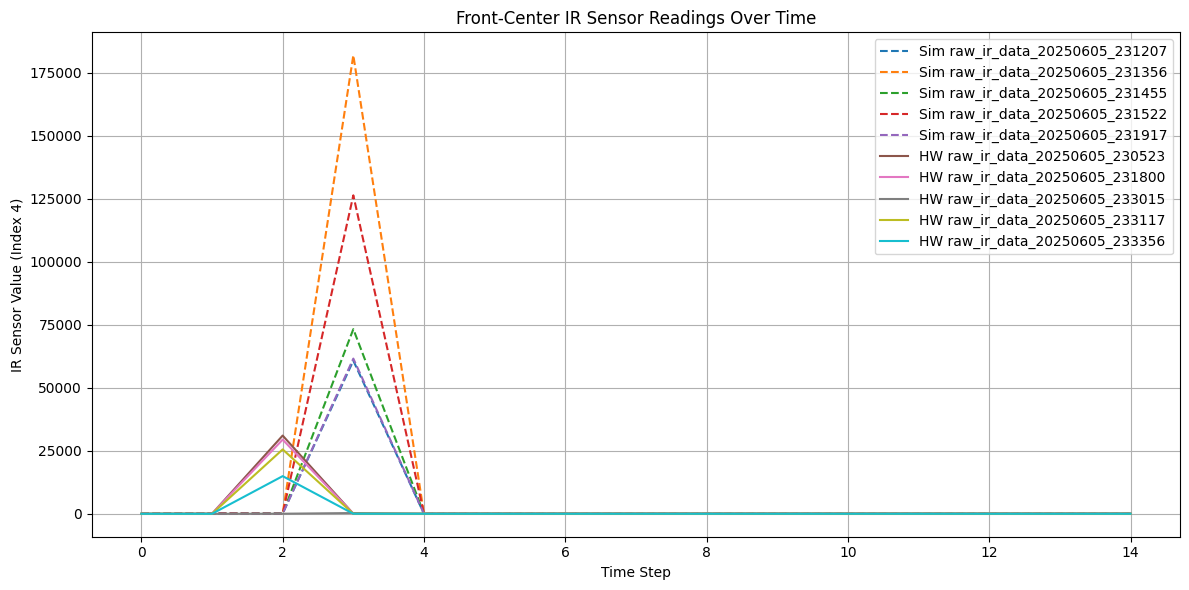

In [3]:
plt.figure(figsize=(12, 6))

for label, run in sim_runs:
    front_values = [step[4] for step in run]
    plt.plot(front_values, label=label, linestyle="--")

for label, run in hw_runs:
    front_values = [step[4] for step in run]
    plt.plot(front_values, label=label)

plt.title("Front-Center IR Sensor Readings Over Time")
plt.xlabel("Time Step")
plt.ylabel("IR Sensor Value (Index 4)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Task 1

In [4]:
import json
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

log_pat = Path("../../../../../results/logs")

In [11]:
with open(log_pat / "move_evolution/run_20250626-211344/evolution_log.json") as f:
    data = json.load(f)

best_fitness_per_gen = data["best_fitness_per_gen"]
avg_fitness_per_gen = data["avg_fitness_per_gen"]

# pandas df with generations and fitness values
df_fitness = pd.DataFrame({
    "Generation": list(range(1, len(best_fitness_per_gen) + 1)),
    "Best Fitness": best_fitness_per_gen,
    "Average Fitness": avg_fitness_per_gen
})
df_fitness.to_csv(log_pat / "move_evolution/best_fitness_per_gen.csv")

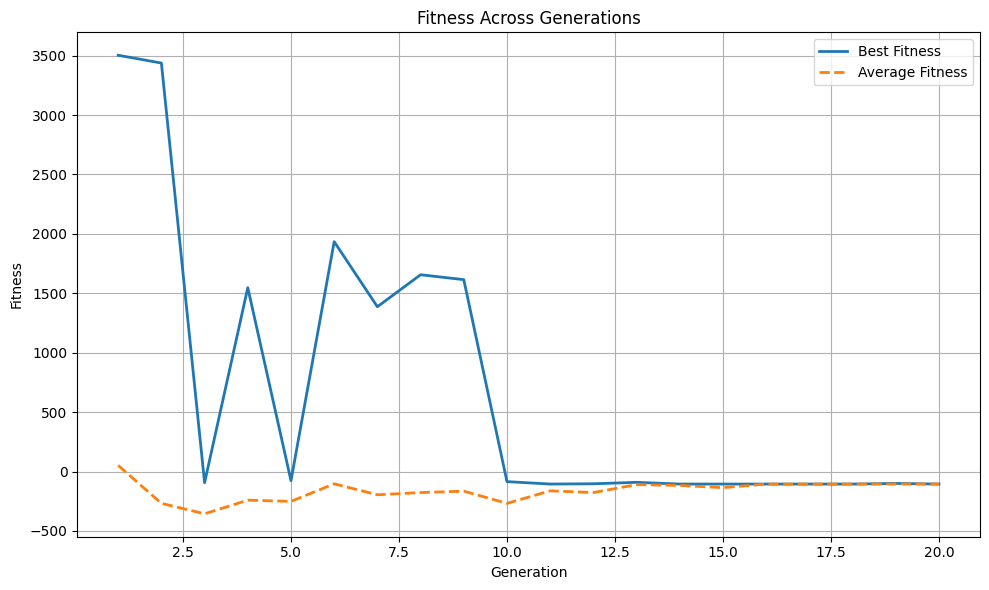

In [6]:
 generations = list(range(1, len(best_fitness_per_gen) + 1))

plt.figure(figsize=(10, 6))
plt.plot(generations, best_fitness_per_gen, label='Best Fitness', linewidth=2)
plt.plot(generations, avg_fitness_per_gen, label='Average Fitness', linewidth=2, linestyle='--')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness Across Generations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

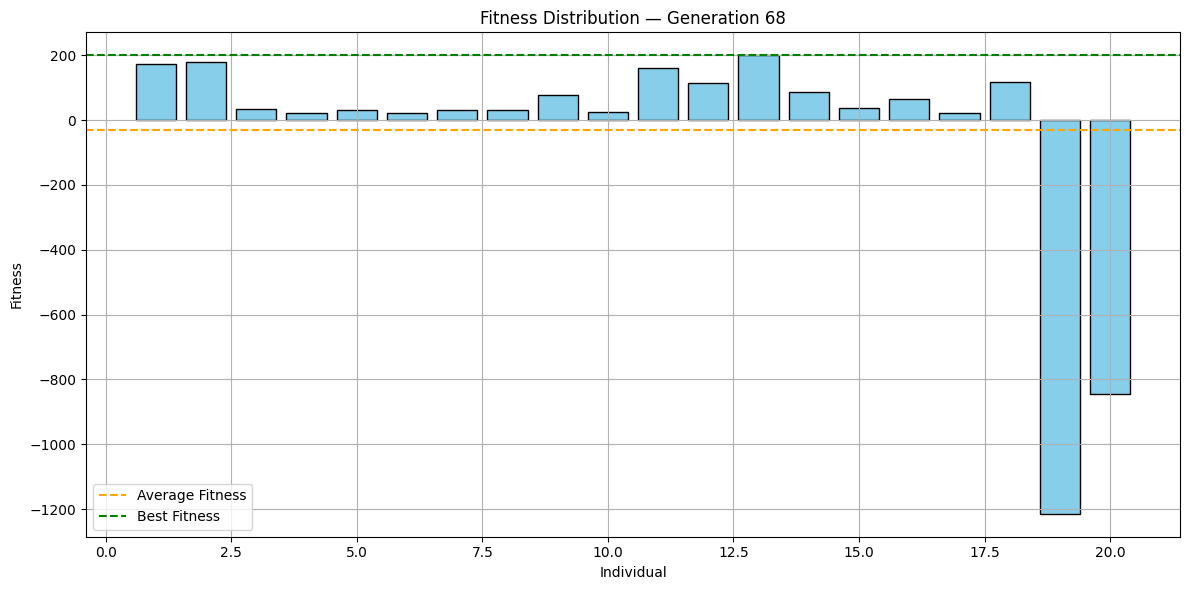

In [7]:
with open(log_pat / "food_evolution/run_20250619-220739/generation_68_summary.json") as f:
    data = json.load(f)

fitness_values = [ind["fitness"] for ind in data["individuals"]]
individual_ids = list(range(1, len(fitness_values) + 1))

plt.figure(figsize=(12, 6))
plt.bar(individual_ids, fitness_values, color='skyblue', edgecolor='black')
plt.axhline(data["avg_fitness"], color='orange', linestyle='--', label='Average Fitness')
plt.axhline(data["best_fitness"], color='green', linestyle='--', label='Best Fitness')
plt.xlabel("Individual")
plt.ylabel("Fitness")
plt.title(f"Fitness Distribution — Generation {data['generation']}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

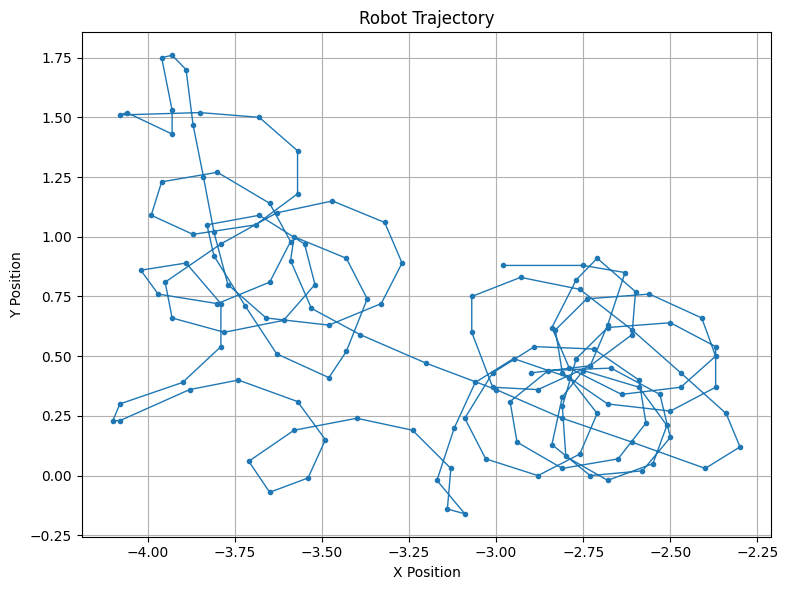

In [8]:
with open(log_pat / "collect/run_20250620-100803/log.json") as f:
    data = json.load(f)

# Extract position and speed over time
timestamps = [step["timestamp"] for step in data["steps"]]
positions = [step["position"] for step in data["steps"]]
left_speeds = [step["left_speed"] for step in data["steps"]]
right_speeds = [step["right_speed"] for step in data["steps"]]

# Convert to DataFrame for easier plotting
df = pd.DataFrame({
    "timestamp": pd.to_datetime(timestamps),
    "x": [pos[0] for pos in positions],
    "y": [pos[1] for pos in positions],
    "left_speed": left_speeds,
    "right_speed": right_speeds
})

# Plot 1: Trajectory of the robot
plt.figure(figsize=(8, 6))
plt.plot(df["x"], df["y"], marker='o', linewidth=1, markersize=3)
plt.title("Robot Trajectory")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.grid(True)
plt.tight_layout()
plt.show()

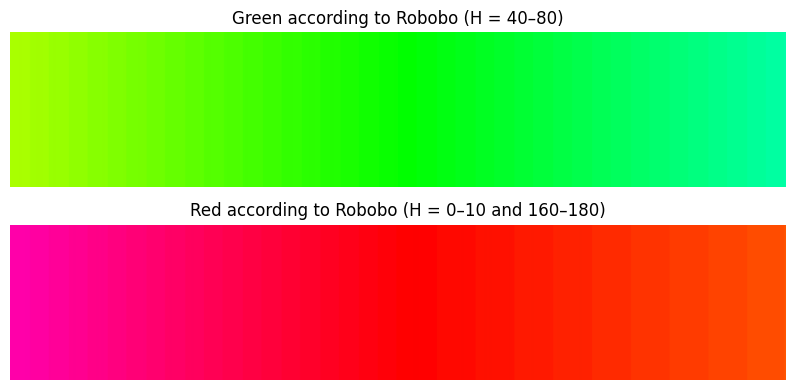

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

width = 500
height = 100

# Green HSV gradient: from H=40 to H=80
hsv_start_green = np.array([40, 255, 255], dtype=np.uint8)
hsv_end_green = np.array([80, 255, 255], dtype=np.uint8)

gradient_hsv_green = np.zeros((height, width, 3), dtype=np.uint8)
for i in range(width):
    alpha = i / (width - 1)
    hsv_pixel = (1 - alpha) * hsv_start_green + alpha * hsv_end_green
    gradient_hsv_green[:, i] = hsv_pixel.astype(np.uint8)

# Red HSV gradient: two ranges [0–10] and [160–180], stitched side by side
width_half = width // 2

# First red range: H=0 to H=10
hsv_start_red1 = np.array([0, 255, 255], dtype=np.uint8)
hsv_end_red1 = np.array([10, 255, 255], dtype=np.uint8)

# Second red range: H=160 to H=180
hsv_start_red2 = np.array([160, 255, 255], dtype=np.uint8)
hsv_end_red2 = np.array([180, 255, 255], dtype=np.uint8)

gradient_hsv_red = np.zeros((height, width, 3), dtype=np.uint8)
for i in range(width_half):
    alpha = i / (width_half - 1)
    hsv_pixel = (1 - alpha) * hsv_start_red1 + alpha * hsv_end_red1
    gradient_hsv_red[:, i + width_half] = hsv_pixel.astype(np.uint8)

for i in range(width_half):
    alpha = i / (width_half - 1)
    hsv_pixel = (1 - alpha) * hsv_start_red2 + alpha * hsv_end_red2
    gradient_hsv_red[:, i] = hsv_pixel.astype(np.uint8)

# Convert HSV to RGB
gradient_rgb_green = cv2.cvtColor(cv2.cvtColor(gradient_hsv_green, cv2.COLOR_HSV2BGR), cv2.COLOR_BGR2RGB)
gradient_rgb_red = cv2.cvtColor(cv2.cvtColor(gradient_hsv_red, cv2.COLOR_HSV2BGR), cv2.COLOR_BGR2RGB)

# Plot both gradients
fig, axs = plt.subplots(2, 1, figsize=(10, 4))

axs[0].imshow(gradient_rgb_green)
axs[0].axis("off")
axs[0].set_title("Green according to Robobo (H = 40–80)")

axs[1].imshow(gradient_rgb_red)
axs[1].axis("off")
axs[1].set_title("Red according to Robobo (H = 0–10 and 160–180)")

plt.tight_layout()
plt.show()

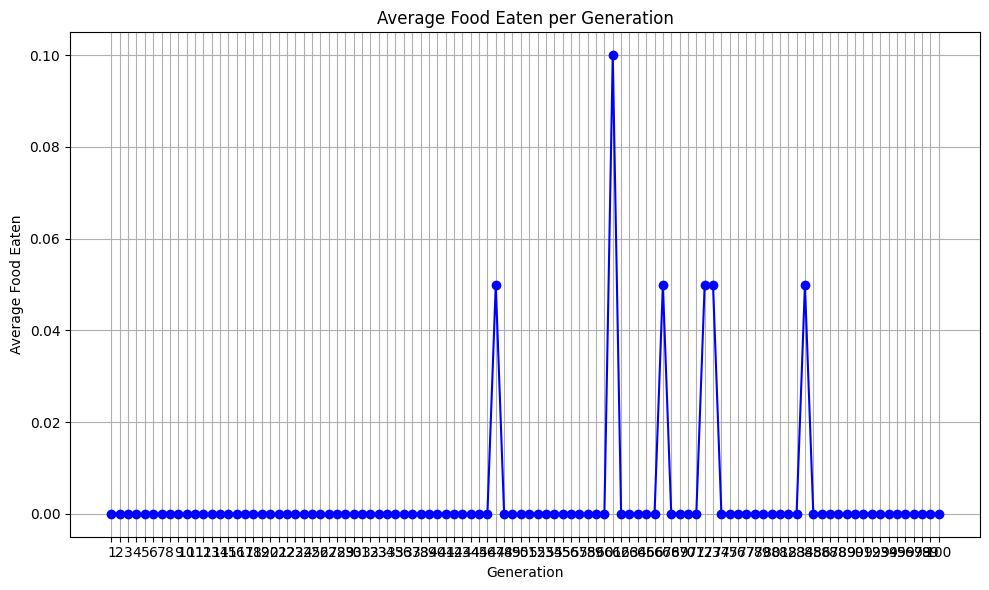

In [10]:
import os

avg_food_ate = []
for file in os.listdir(log_pat / "food_evolution/run_20250619-220739/"):
    if file.endswith(".json") and "generation" in file:
        with open(log_pat / "food_evolution/run_20250619-220739/" / file) as f:
            data = json.load(f)
            food_hits = 0
        for individual in data["individuals"]:
            food_hits += individual["food_hits"]
        avg_food_ate.append(food_hits / len(data["individuals"]))

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(avg_food_ate) + 1), avg_food_ate, marker='o', linestyle='-', color='blue')
plt.title("Average Food Eaten per Generation")
plt.xlabel("Generation")
plt.ylabel("Average Food Eaten")
plt.xticks(range(1, len(avg_food_ate) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()